In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import FastMarkerCluster
sns.set_style("darkgrid")

In [34]:
data_path = "data/"
places = pd.read_csv(data_path + "places_cleaned.csv")
reviews = pd.read_csv(data_path + "reviews_cleaned.csv")
places.dropna(subset=["category"], inplace=True)

Our project uses the [Google Local](https://cseweb.ucsd.edu/~jmcauley/datasets.html#google_local) data published by Professor Julian McAuley from University of California, San Diego. The data contains reviews about businesses along with their geographical location. The raw data has 3.116.785 businesses and 11.453.845 reviews, which spans across locations all over the world.\

For this project, we wish to focus solely on businesses located in London and Manhattan in NYC, which we have accomplished through preprocessing of the data located in [this notebook](./Data%20Processing.ipynb).

**Write about project purpose and anticipated methods used**

## 1.1 Places

In [35]:
print("Shape of places df:", places.shape)
places.head()

Shape of places df: (29688, 9)


,gPlusPlaceId,name,price,lat,lon,city,address,Grid,category
0,101742583391038750118,Carpo London,NaN,51.509499,-0.135762,London,"16 Piccadilly, London W1J 0DE, United Kingdom",L159,Chocolate Shop
1,100574642292837870712,Premium Cars,NaN,51.514637,-0.064980,London,"10 Commercial Road Premium Cars First Floor, S...",L186,Car Rental Agency
2,105185983265572241970,eSpares Ltd,NaN,51.479416,-0.179209,London,"Chelsea Wharf, 15 Lots Rd, London, Chelsea SW1...",L40,Wholesaler
3,104500852703501308358,Superdrug,NaN,51.494537,-0.145769,London,"Unit 35, Victoria Railway Station, London SW1V...",L101,Beauty Supply Store
4,107519298595557659572,Kura,2.0,51.502122,-0.163029,London,"3-4 Park Close, London SW1X 7PQ, United Kingdom",L137,Asian Restaurant


Here we find a unique `gPlusPlaceId` for each business in the dataset accompanied by other features such as the `name`, `price` range, geographical location,  `Grid` number and business `category`. We have placed a grid over London and Manhattan in order to encapsulate the businesses located there, where the `Grid` feature indicates which grid cell a certain business belongs to.

Through the data preprocessing, many of the missing values in the dataset have been removed with the exception of the ones in the `price` column. This is done since we wish to create a NLP classifier that can enrich the businesses with missing price range in the dataset.

In [36]:
places.isna().sum()

gPlusPlaceId        0
name                0
price           19488
lat                 0
lon                 0
city                0
address             0
Grid                0
category            0
dtype: int64

To dive deeper into our dataset, we'll provide visualizations of the different features. Let's have a look at the number of businesses 

In [37]:
london_df = places[places.city == "London"]
london_map = folium.Map(location=london_df[["lat", "lon"]].mean(), control_scale=True, zoom_start=12)
london_map.add_child(FastMarkerCluster(london_df[['lat','lon']].values.tolist()))

In [38]:
ny_df = places[places.city == "New York"]
ny_map = folium.Map(location=ny_df[["lat", "lon"]].mean(), control_scale=True, zoom_start=12)
ny_map.add_child(FastMarkerCluster(ny_df[['lat','lon']].values.tolist()))

In [39]:
for city in places.city.unique():
    print(f"Top 5 categories for {city}")
    print(places[lambda x: x['city'] == city].category.value_counts().head(5))
    print()

Top 5 categories for London
European Restaurant    828
Bar                    781
Asian Restaurant       772
Cafe                   731
Pub                    695
Name: category, dtype: int64

Top 5 categories for New York
European Restaurant    799
Asian Restaurant       797
American Restaurant    736
Bar                    499
Clothing Store         470
Name: category, dtype: int64



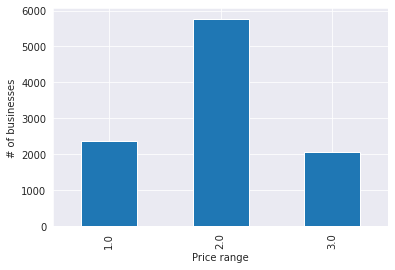

In [40]:
places.price.value_counts().sort_index().plot.bar(ylabel="# of businesses", xlabel="Price range");

## 1.2 Reviews

In [52]:
print("Shape of reviews df:", reviews.shape)
reviews.head()

Shape of reviews df: (257122, 6)


,rating,reviewerName,reviewText,gPlusPlaceId,gPlusUserId,reviewTextClean
0,3.0,elicia richardson-ellis,This is a very cute hotel with good amenities ...,106689630448064755324,100000340778638927606,cute hotel good amenity nice location great cr...
1,4.0,elicia richardson-ellis,Love this place. The Great/Good: Massage an...,108256990636148259283,100000340778638927606,love place massage facial technician best loun...
2,4.0,Nakamura Zen,NaN,104395160856690993217,100000469599933991939,NaN
3,4.0,Nakamura Zen,NaN,116090508615311611202,100000469599933991939,NaN
4,5.0,Yordanka Ilieva,Perfect service. The staff were very helpful.,111440664244734940136,100000520090706194742,perfect service staff helpful


In [53]:
reviews.isna().sum()

rating                 0
reviewerName           0
reviewText         69260
gPlusPlaceId           0
gPlusUserId            0
reviewTextClean    69651
dtype: int64

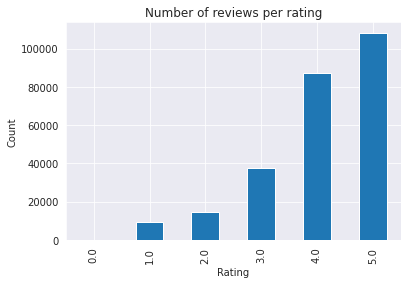

In [41]:
# Fjerne 0 rækker i reviews
reviews.rating.value_counts().sort_index().plot.bar(xlabel="Rating", ylabel="Count", title="Number of reviews per rating");

Text(0.5, 0, 'Number of words')

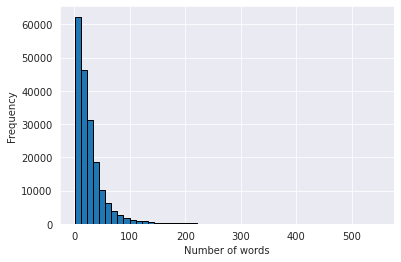

In [50]:
# Distribution of the amount of characters in the reviews
reviews['reviewTextCleanLen'] = 
review_hist = reviews.dropna(subset=["reviewTextClean"]).reviewTextClean.apply(lambda x: len(x.split(" "))).plot.hist(bins=50, edgecolor="black")
review_hist.set_xlabel("Number of words")

## 1.3 Zone dataframe